In [11]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.models import resnet18, alexnet
import torch.optim as optim
from torch_funcs import fit, test, get_cifar10_loaders

In [12]:
# config
batch_size = 16
test_batch_size = 32
epochs = 2
lr = 1e-3
loss_func = F.cross_entropy

use_cuda = torch.cuda.is_available()
device = torch.device("cuda"
                      if use_cuda
											else "cpu"
										)
print(f'CUDA enabled: {use_cuda}')

CUDA enabled: True


In [13]:
model_R = resnet18()
model_R.fc = nn.Linear(in_features=512, out_features=10)
model_R = model_R.to(device)

model_A = alexnet()
model_A.classifier[4] = nn.Linear(in_features=4096, out_features=1024) # gradual change in hopes of reducing overfitting
model_A.classifier[6] = nn.Linear(in_features=1024, out_features=10)
model_A = model_A.to(device)

optimizer_R = optim.SGD(model_R.parameters(), lr=lr, momentum=0.9)
optimizer_A = optim.SGD(model_A.parameters(), lr=lr, momentum=0.9)

Important thing to remember here is that several nets (such as AlexNet for example) cannot work on CIFAR-10 dataset
direclty as 32x32 images are too small. That's why `get_cifar10_loaders` internally resizes all pictures t0 224x224
pixels to meet the requirements as suggested [here](https://discuss.pytorch.org/t/given-input-size-256x1x1-calculated-output-size-256x0x0/40941). 
This parameter might change for an even bigger multiple of 32 since not all nets have been tested yet.  
  
This input transform shall be repeated for all technologies examined in this paper.

In [14]:
train_dl, test_dl = get_cifar10_loaders(batch_size, test_batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
train_history_R = []
acc_history_R = []

print('RESNET18')
for epoch in range(1, epochs + 1):
	train_history_R.extend( fit(model_R, device, train_dl, loss_func, epoch, optimizer=optimizer_R, silent=False) )
	acc_history_R.append( test(model_R, device, test_dl, loss_func, silent=True) )

del model_R

RESNET18
Train Epoch: 1 -> batch: 99 [1584/50000 (3%)]	Loss: 2.155298
Train Epoch: 1 -> batch: 199 [3184/50000 (6%)]	Loss: 1.939064
Train Epoch: 1 -> batch: 299 [4784/50000 (10%)]	Loss: 1.883182
Train Epoch: 1 -> batch: 399 [6384/50000 (13%)]	Loss: 1.827168
Train Epoch: 1 -> batch: 499 [7984/50000 (16%)]	Loss: 1.799285
Train Epoch: 1 -> batch: 599 [9584/50000 (19%)]	Loss: 1.675142
Train Epoch: 1 -> batch: 699 [11184/50000 (22%)]	Loss: 1.688682
Train Epoch: 1 -> batch: 799 [12784/50000 (26%)]	Loss: 1.618484
Train Epoch: 1 -> batch: 899 [14384/50000 (29%)]	Loss: 1.597820
Train Epoch: 1 -> batch: 999 [15984/50000 (32%)]	Loss: 1.583989
Train Epoch: 1 -> batch: 1099 [17584/50000 (35%)]	Loss: 1.554789
Train Epoch: 1 -> batch: 1199 [19184/50000 (38%)]	Loss: 1.599228
Train Epoch: 1 -> batch: 1299 [20784/50000 (42%)]	Loss: 1.542796
Train Epoch: 1 -> batch: 1399 [22384/50000 (45%)]	Loss: 1.508495
Train Epoch: 1 -> batch: 1499 [23984/50000 (48%)]	Loss: 1.503480
Train Epoch: 1 -> batch: 1599 [2558

In [16]:
train_history_A = []
acc_history_A = []

print('ALEXNET')
for epoch in range(1, epochs + 1):
	train_history_A.extend( fit(model_A, device, train_dl, loss_func, epoch, optimizer=optimizer_A, silent=False) )
	acc_history_A.append( test(model_A, device, test_dl, loss_func, silent=True) )

del model_A

ALEXNET
Train Epoch: 1 -> batch: 99 [1584/50000 (3%)]	Loss: 2.302642
Train Epoch: 1 -> batch: 199 [3184/50000 (6%)]	Loss: 2.302791
Train Epoch: 1 -> batch: 299 [4784/50000 (10%)]	Loss: 2.303612
Train Epoch: 1 -> batch: 399 [6384/50000 (13%)]	Loss: 2.302738
Train Epoch: 1 -> batch: 499 [7984/50000 (16%)]	Loss: 2.302699
Train Epoch: 1 -> batch: 599 [9584/50000 (19%)]	Loss: 2.302531
Train Epoch: 1 -> batch: 699 [11184/50000 (22%)]	Loss: 2.302410
Train Epoch: 1 -> batch: 799 [12784/50000 (26%)]	Loss: 2.302506
Train Epoch: 1 -> batch: 899 [14384/50000 (29%)]	Loss: 2.301436
Train Epoch: 1 -> batch: 999 [15984/50000 (32%)]	Loss: 2.302119
Train Epoch: 1 -> batch: 1099 [17584/50000 (35%)]	Loss: 2.301780
Train Epoch: 1 -> batch: 1199 [19184/50000 (38%)]	Loss: 2.300853
Train Epoch: 1 -> batch: 1299 [20784/50000 (42%)]	Loss: 2.301267
Train Epoch: 1 -> batch: 1399 [22384/50000 (45%)]	Loss: 2.300905
Train Epoch: 1 -> batch: 1499 [23984/50000 (48%)]	Loss: 2.300388
Train Epoch: 1 -> batch: 1599 [25584

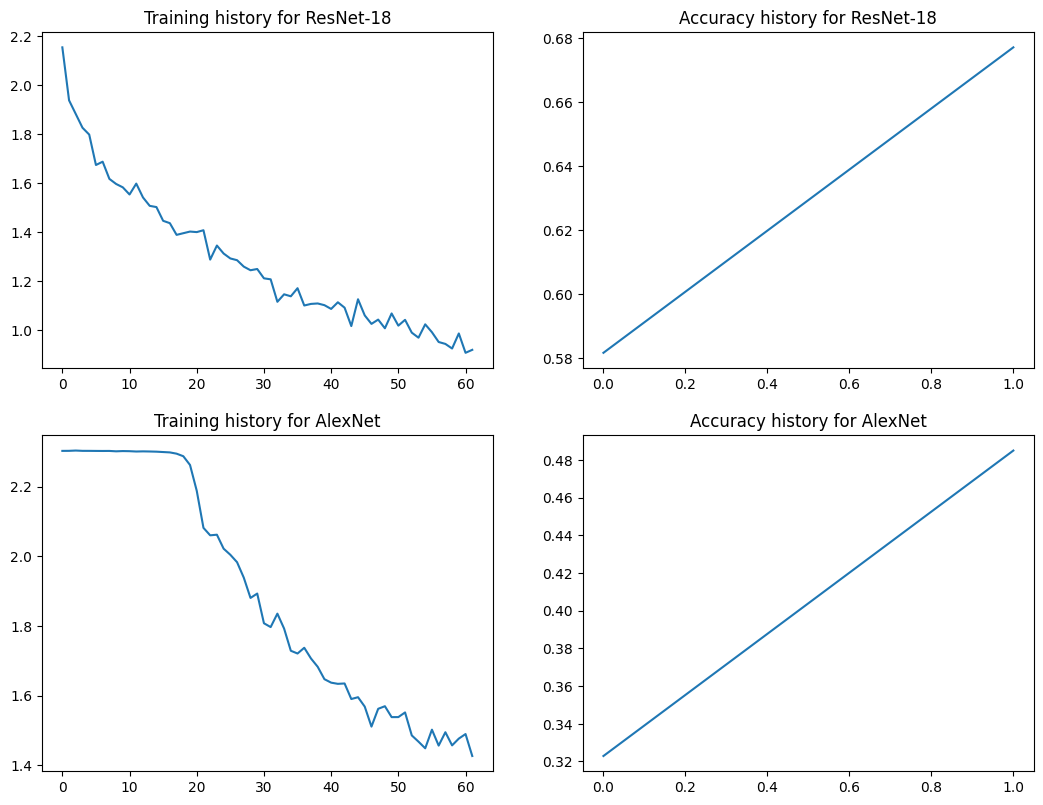

In [17]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12.8, 9.6)
ax_train_R, ax_test_R, ax_train_A, ax_test_A = axes.flatten()

ax_train_R.plot(train_history_R)
ax_train_R.set_title('Training history for ResNet-18')

ax_test_R.plot(acc_history_R)
ax_test_R.set_title('Accuracy history for ResNet-18')

ax_train_A.plot(train_history_A)
ax_train_A.set_title('Training history for AlexNet')

ax_test_A.plot(acc_history_A)
ax_test_A.set_title('Accuracy history for AlexNet')

plt.show(fig)